# Predicting Austrailian Rain

In [54]:
#import libraries and format output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [2]:
#read in data
df = pd.read_csv('weatherAUS.csv')

## Data Cleaning

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
# quantity of missing values in each column
df.isnull().sum().sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
RainTomorrow         0
RISK_MM              0
Date                 0
dtype: int64

In [5]:
# percentage of missing values in each column
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

Sunshine         0.476929
Evaporation      0.427890
Cloud3pm         0.401525
Cloud9am         0.377353
Pressure9am      0.098556
Pressure3pm      0.098324
WindDir9am       0.070418
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir3pm       0.026570
Humidity3pm      0.025388
Temp3pm          0.019171
WindSpeed3pm     0.018496
Humidity9am      0.012476
RainToday        0.009888
Rainfall         0.009888
WindSpeed9am     0.009480
Temp9am          0.006358
MinTemp          0.004480
MaxTemp          0.002265
Location         0.000000
RainTomorrow     0.000000
RISK_MM          0.000000
Date             0.000000
dtype: float64

In [6]:
# missing values based on weather station
df.groupby(by = ['Location']).agg('count')

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,3090,3088,3088,3020,1649,1698,3067,3067,2831,3075,3085,3085,3085,3085,3082,3083,0,0,3085,3086,3020,3090,3090
Albany,3016,2957,2984,2996,2736,2510,0,0,2772,2249,2958,2299,2970,2316,2991,2992,2981,2321,2980,2320,2996,3016,3016
Albury,3011,3005,3010,2991,0,0,3001,3001,2494,2969,3007,3004,3007,3007,3011,3007,1282,1415,3007,3007,2991,3011,3011
AliceSprings,3031,3030,3030,3025,2820,2520,2981,2981,2801,3027,3029,3029,3028,3026,3030,3028,2699,2673,3031,3029,3025,3031,3031
BadgerysCreek,2928,2916,2925,2877,0,0,2912,2912,2533,2868,2906,2905,2899,2897,2785,2780,0,0,2912,2908,2877,2928,2928
Ballarat,3028,3027,3027,3017,0,0,3004,3004,2937,3012,3020,3025,3007,3022,3004,3004,2484,1987,3016,3023,3017,3028,3028
Bendigo,3034,3033,3033,3030,1185,0,2998,2999,2791,2992,3031,3031,3029,3033,3020,3025,2070,2267,3032,3033,3030,3034,3034
Brisbane,3161,3155,3157,3132,3142,3113,3146,3146,3092,3134,3161,3159,3159,3152,3161,3159,3160,3159,3159,3152,3132,3161,3161
Cairns,2988,2987,2988,2964,2647,2562,2970,2971,2946,2984,2988,2987,2988,2988,2988,2988,2803,2782,2988,2988,2964,2988,2988


In [7]:
len(df.groupby(by = ['Location']).agg('size').values)

49

In [8]:
s = df.groupby(by = ['Location']).agg('size')
temp = pd.concat([s] * 23, axis = 1)
temp.columns = df.groupby(by = ['Location']).agg('count').columns 
(temp - df.groupby(by = ['Location']).agg('count')) / temp

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.0,0.000647,0.000647,0.022654,0.466343,0.450485,0.007443,0.007443,0.083819,0.004854,0.001618,0.001618,0.001618,0.001618,0.002589,0.002265,1.000000,1.000000,0.001618,0.001294,0.022654,0.0,0.0
Albany,0.0,0.019562,0.010610,0.006631,0.092838,0.167772,1.000000,1.000000,0.080902,0.254310,0.019231,0.237732,0.015252,0.232095,0.008289,0.007958,0.011605,0.230438,0.011936,0.230769,0.006631,0.0,0.0
Albury,0.0,0.001993,0.000332,0.006642,1.000000,1.000000,0.003321,0.003321,0.171704,0.013949,0.001328,0.002325,0.001328,0.001328,0.000000,0.001328,0.574228,0.530056,0.001328,0.001328,0.006642,0.0,0.0
AliceSprings,0.0,0.000330,0.000330,0.001980,0.069614,0.168591,0.016496,0.016496,0.075883,0.001320,0.000660,0.000660,0.000990,0.001650,0.000330,0.000990,0.109535,0.118113,0.000000,0.000660,0.001980,0.0,0.0
BadgerysCreek,0.0,0.004098,0.001025,0.017418,1.000000,1.000000,0.005464,0.005464,0.134904,0.020492,0.007514,0.007855,0.009904,0.010587,0.048839,0.050546,1.000000,1.000000,0.005464,0.006831,0.017418,0.0,0.0
Ballarat,0.0,0.000330,0.000330,0.003633,1.000000,1.000000,0.007926,0.007926,0.030053,0.005284,0.002642,0.000991,0.006935,0.001982,0.007926,0.007926,0.179657,0.343791,0.003963,0.001651,0.003633,0.0,0.0
Bendigo,0.0,0.000330,0.000330,0.001318,0.609426,1.000000,0.011866,0.011536,0.080092,0.013843,0.000989,0.000989,0.001648,0.000330,0.004614,0.002966,0.317732,0.252802,0.000659,0.000330,0.001318,0.0,0.0
Brisbane,0.0,0.001898,0.001265,0.009174,0.006011,0.015185,0.004745,0.004745,0.021829,0.008542,0.000000,0.000633,0.000633,0.002847,0.000000,0.000633,0.000316,0.000633,0.000633,0.002847,0.009174,0.0,0.0
Cairns,0.0,0.000335,0.000000,0.008032,0.114123,0.142570,0.006024,0.005689,0.014056,0.001339,0.000000,0.000335,0.000000,0.000000,0.000000,0.000000,0.061914,0.068942,0.000000,0.000000,0.008032,0.0,0.0


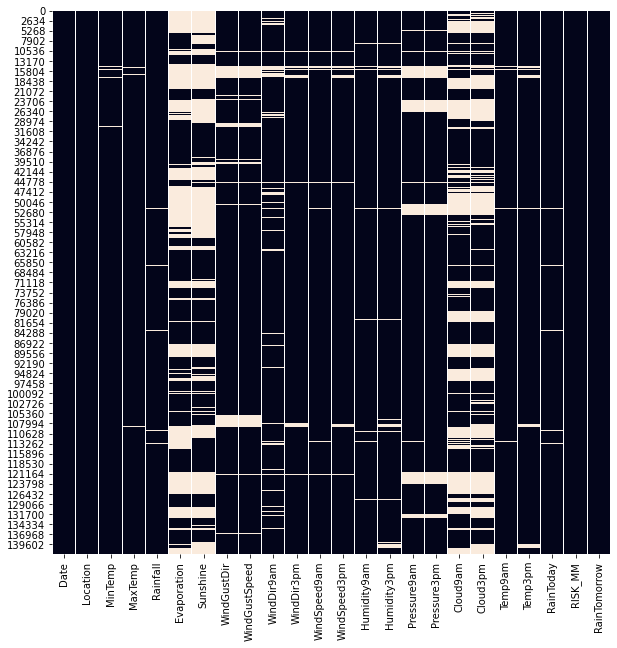

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [11]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [151]:
#next steps figure out locations of each weather center and impute based on nearby neighbors
New_location_names = {'Albury': 'ALBURY AIRPORT AWS',
                      'BadgerysCreek': 'BADGERYS CREEK AWS',
                      'Cobar': 'COBAR AIRPORT AWS',
                      'CoffsHarbour': 'COFFS HARBOUR AIRPORT',
                      'Moree': 'MOREE AERO',
                      'Newcastle': 'NEWCASTLE NOBBYS SIGNAL STATION AWS',
                      'NorahHead': 'NORAH HEAD AWS',
                      'NorfolkIsland': 'NORFOLK ISLAND AERO',
                      'Penrith': 'PENRITH LAKES AWS',
                      'Richmond': 'RICHMOND AIRPORT',
                      'Sydney': 'SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE)',
                      'SydneyAirport': 'SYDNEY AIRPORT AMO',
                      'WaggaWagga': 'WAGGA WAGGA AMO',
                      'Williamtown': 'WILLIAMTOWN RAAF',
                      'Wollongong': 'WOLLONGONG UNIVERSITY',
                      'Canberra': 'CANBERRA AIRPORT',
                      'Tuggeranong': 'TUGGERANONG (ISABELLA PLAINS) AWS',
                      'MountGinini': 'MOUNT GININI AWS',
                      'Ballarat': 'BALLARAT AERODROME',
                      'Bendigo': 'BENDIGO AIRPORT',
                      'Sale': 'EAST SALE',
                      'MelbourneAirport': 'MELBOURNE AIRPORT',
                      'Melbourne': 'MELBOURNE (OLYMPIC PARK)',
                      'Mildura': 'MILDURA AIRPORT',
                      'Nhil': 'NHILL AERODROME',
                      'Portland': 'PORTLAND (CASHMORE AIRPORT)',
                      'Watsonia': 'WATSONIA',
                      'Dartmoor': 'DARTMOOR',
                      'Brisbane': 'BRISBANE',
                      'Cairns': 'CAIRNS AERO',
                      'GoldCoast': 'GOLD COAST SEAWAY',
                      'Townsville': 'TOWNSVILLE AERO',
                      'Adelaide': 'ADELAIDE AIRPORT',
                      'MountGambier': 'MOUNT GAMBIER AERO',
                      'Nuriootpa': 'NURIOOTPA PIRSA',
                      'Woomera': 'WOOMERA AERODROME',
                      'Albany': 'ALBANY',
                      'Witchcliffe': 'WITCHCLIFFE',
                      'PearceRAAF': 'PEARCE RAAF',
                      'PerthAirport': 'PERTH AIRPORT',
                      'Perth': 'PERTH METRO',
                      'SalmonGums': 'SALMON GUMS RES.STN.',
                      'Walpole': 'NORTH WALPOLE',
                      'Hobart': 'HOBART (ELLERSLIE ROAD)',
                      'Launceston': 'LAUNCESTON (TI TREE BEND)',
                      'AliceSprings': 'ALICE SPRINGS AIRPORT',
                      'Darwin': 'DARWIN AIRPORT',
                      'Katherine': 'KATHERINE COUNTRY CLUB',
                      'Uluru': 'ULURU'
                     }
Location = {'ALBURY AIRPORT AWS': {'Lat': -36.0690, 'Lon': 146.9509},
            'BADGERYS CREEK AWS': {'Lat': -33.8969, 'Lon': 150.7281},
            'COBAR AIRPORT AWS': {'Lat': -31.5388, 'Lon': 145.7964},
            'COFFS HARBOUR AIRPORT': {'Lat': -30.3189, 'Lon': 153.1162},
            'MOREE AERO': {'Lat': -29.4898, 'Lon': 149.8471},
            'NEWCASTLE NOBBYS SIGNAL STATION AWS': {'Lat': -32.9184, 'Lon': 151.7985},
            'NORAH HEAD AWS': {'Lat': -33.2814, 'Lon': 151.5766},
            'NORFOLK ISLAND AERO': {'Lat': -29.0389, 'Lon': 167.9408},
            'PENRITH LAKES AWS': {'Lat': -33.7195, 'Lon': 150.6783},
            'RICHMOND AIRPORT': {'Lat': -20.7017, 'Lon': 143.1167},
            'SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE)': {'Lat': -33.8338, 'Lon': 151.0718},
            'SYDNEY AIRPORT AMO': {'Lat': -33.9465, 'Lon': 151.1731},
            'WAGGA WAGGA AMO': {'Lat': -35.1583, 'Lon': 147.4575},
            'WILLIAMTOWN RAAF': {'Lat': -32.7939, 'Lon': 151.8364},
            'WOLLONGONG UNIVERSITY': {'Lat': -34.4030, 'Lon': 150.8795},
            'CANBERRA AIRPORT': {'Lat': -35.3088, 'Lon': 149.2004},
            'TUGGERANONG (ISABELLA PLAINS) AWS': {'Lat': -35.4184, 'Lon': 149.0937},
            'MOUNT GININI AWS': {'Lat': -35.5293, 'Lon': 148.7721},
            'BALLARAT AERODROME': {'Lat': -37.5127, 'Lon': 143.7911},
            'BENDIGO AIRPORT': {'Lat': -36.7411, 'Lon': 144.3275},
            'EAST SALE': {'Lat': -38.1156, 'Lon': 147.1322},
            'MELBOURNE AIRPORT': {'Lat': -37.6654, 'Lon': 144.8322},
            'MELBOURNE (OLYMPIC PARK)': {'Lat': -37.8255, 'Lon': 144.9816},
            'MILDURA AIRPORT': {'Lat': -34.2358, 'Lon': 142.0867},
            'NHILL AERODROME': {'Lat': -36.3092, 'Lon': 141.6486},
            'PORTLAND (CASHMORE AIRPORT)': {'Lat': -38.3148, 'Lon': 141.4705},
            'WATSONIA': {'Lat': -37.7080, 'Lon': 145.0830},
            'DARTMOOR': {'Lat': -37.9222, 'Lon': 141.2614},
            'BRISBANE': {'Lat': -27.4808, 'Lon': 153.0389},
            'CAIRNS AERO': {'Lat': -16.8736, 'Lon': 145.7458},
            'GOLD COAST SEAWAY': {'Lat': -27.9390, 'Lon': 153.4283},
            'TOWNSVILLE AERO': {'Lat': -19.2483, 'Lon': 146.7661},
            'ADELAIDE AIRPORT': {'Lat': -34.9524, 'Lon': 138.5196},
            'MOUNT GAMBIER AERO': {'Lat': -37.7473, 'Lon': 140.7739},
            'NURIOOTPA PIRSA': {'Lat': -34.4761, 'Lon': 139.0056},
            'WOOMERA AERODROME': {'Lat': -31.1558, 'Lon': 136.8054},
            'ALBANY': {'Lat': -35.0289, 'Lon': 117.8808},
            'WITCHCLIFFE': {'Lat': -34.0281, 'Lon': 115.1042},
            'PEARCE RAAF': {'Lat': -31.6669, 'Lon': 116.0189},
            'PERTH AIRPORT': {'Lat': -31.9275, 'Lon': 115.9764},
            'PERTH METRO': {'Lat': -31.9192, 'Lon': 115.8728},
            'SALMON GUMS RES.STN.': {'Lat': -32.9869, 'Lon': 121.6239},
            'NORTH WALPOLE': {'Lat': -34.9469, 'Lon': 116.7222},
            'HOBART (ELLERSLIE ROAD)': {'Lat': -42.8897, 'Lon': 147.3278},
            'LAUNCESTON (TI TREE BEND)': {'Lat': -41.4194, 'Lon': 147.1219},
            'ALICE SPRINGS AIRPORT': {'Lat': -23.7951, 'Lon': 133.8890},
            'DARWIN AIRPORT': {'Lat': -12.4239, 'Lon': 130.8925},
            'KATHERINE COUNTRY CLUB': {'Lat': -14.4728, 'Lon': 132.2612},
            'ULURU': {'Lat': -25.3444, 'Lon': 131.0369}
           }

In [13]:
df['Location'] = df['Location'].map(New_location_names)

In [14]:
df['Location'].unique()

array(['ALBURY AIRPORT AWS', 'BADGERYS CREEK AWS', 'COBAR AIRPORT AWS',
       'COFFS HARBOUR AIRPORT', 'MOREE AERO',
       'NEWCASTLE NOBBYS SIGNAL STATION AWS', 'NORAH HEAD AWS',
       'NORFOLK ISLAND AERO', 'PENRITH LAKES AWS', 'RICHMOND AIRPORT',
       'SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE)', 'SYDNEY AIRPORT AMO',
       'WAGGA WAGGA AMO', 'WILLIAMTOWN RAAF', 'WOLLONGONG UNIVERSITY',
       'CANBERRA AIRPORT', 'TUGGERANONG (ISABELLA PLAINS) AWS',
       'MOUNT GININI AWS', 'BALLARAT AERODROME', 'BENDIGO AIRPORT',
       'EAST SALE', 'MELBOURNE AIRPORT', 'MELBOURNE (OLYMPIC PARK)',
       'MILDURA AIRPORT', 'NHILL AERODROME',
       'PORTLAND (CASHMORE AIRPORT)', 'WATSONIA', 'DARTMOOR', 'BRISBANE',
       'CAIRNS AERO', 'GOLD COAST SEAWAY', 'TOWNSVILLE AERO',
       'ADELAIDE AIRPORT', 'MOUNT GAMBIER AERO', 'NURIOOTPA PIRSA',
       'WOOMERA AERODROME', 'ALBANY', 'WITCHCLIFFE', 'PEARCE RAAF',
       'PERTH AIRPORT', 'PERTH METRO', 'SALMON GUMS RES.STN.',
       'NORTH WALPOLE'

In [15]:
df['Latitude'] = df['Location'].map(Location).map(lambda x: x['Lat'])
df['Longitude'] = df['Location'].map(Location).map(lambda x: x['Lon'])

In [16]:
condition = [
                (df['Latitude'] < -27) & (df['Longitude'] > 136), #southeast
                (df['Latitude'] > -21), #north
                (df['Longitude'] < 122) #southwest
]

choices = [
            'SouthEast',
            'North',
            'SouthWest'
]

df['GeoGroup'] = np.select(condition, choices, default = 'Central')

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude,GeoGroup
0,2008-12-01,ALBURY AIRPORT AWS,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,-36.069,146.9509,SouthEast
1,2008-12-02,ALBURY AIRPORT AWS,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,-36.069,146.9509,SouthEast
2,2008-12-03,ALBURY AIRPORT AWS,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,-36.069,146.9509,SouthEast
3,2008-12-04,ALBURY AIRPORT AWS,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,-36.069,146.9509,SouthEast
4,2008-12-05,ALBURY AIRPORT AWS,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,-36.069,146.9509,SouthEast


In [152]:
import folium

m1=folium.Map(location=[-25.2744, 133.7751],tiles='cartodbpositron',zoom_start=4)


# Adding Custom Markers
for key, value in Location.items():
    if (value['Lat'] < -27) & (value['Lon'] > 136):#southeast
        color = 'blue'
    elif (value['Lat'] > -21): #north
        color = 'orange'
    elif (value['Lon'] < 122): #southwest
        color = 'green'
    else:
        color = 'beige'
    folium.Marker(location=[value['Lat'], value['Lon']],popup=f'Lat:{value["Lat"]} Lon:{value["Lon"]}',tooltip=key,icon=folium.Icon(color=color,icon='none')).add_to(m1)

m1

## Change Rain columns to binary

In [19]:
df['RainToday'] = 1 * (df['RainToday'] == 'Yes')
df['RainTomorrow'] = 1 * (df['RainTomorrow'] == 'Yes')

## Seperate categorical features from continuous features

In [20]:
categorical_features = list(df.columns[df.dtypes == 'object'])
categorical_features.append('RainToday')
categorical_features.append('RainTomorrow')
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'GeoGroup',
 'RainToday',
 'RainTomorrow']

In [21]:
continuous_features = list(df.columns[df.dtypes == 'float64'])
continuous_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'Latitude',
 'Longitude']

## Replace Null/Missing Values

In [22]:
def find_mode(series):
    try:
        return series.value_counts().index[0]
    except: 
        return np.nan
fill_cat_na_df = df.groupby(by = ['Date','GeoGroup'])[categorical_features].agg(find_mode)
fill_cont_na_df = df.groupby(by = ['Date', 'GeoGroup'])[continuous_features].mean()

In [23]:
fill_cat_na_df

Location WindGustDir WindDir9am WindDir3pm  \
Date       GeoGroup                                                           
2007-11-01 SouthEast     CANBERRA AIRPORT          NW         SW         NW   
2007-11-02 SouthEast     CANBERRA AIRPORT         ENE          E          W   
2007-11-03 SouthEast     CANBERRA AIRPORT          NW          N        NNE   
2007-11-04 SouthEast     CANBERRA AIRPORT          NW        WNW          W   
2007-11-05 SouthEast     CANBERRA AIRPORT         SSE        SSE        ESE   
...                                   ...         ...        ...        ...   
2017-06-24 SouthEast  NORFOLK ISLAND AERO           W         SW          W   
           SouthWest        NORTH WALPOLE          SE         SE         SE   
2017-06-25 North          TOWNSVILLE AERO          SE         SE        ENE   
           SouthEast  NORFOLK ISLAND AERO          NW          N        WNW   
           SouthWest        NORTH WALPOLE           E        WNW        ESE   

                      RainToday  RainTomorrow  
Date       GeoGroup                            
2007-11-01 SouthEast          0             1  
2007-11-02 SouthEast          1             1  
2007-11-03 SouthEast          1             1  
2007-11-04 SouthEast          1             1  
2007-11-05 SouthEast          1             0  
...                         ...           ...  
2017-06-24 SouthEast          0             0  
           SouthWest          0             0  
2017-06-25 North              0             0  
           SouthEast          0             0  
           SouthWest          0             0  

[12861 rows x 6 columns]

In [24]:
fill_na_df = pd.concat([fill_cont_na_df, fill_cat_na_df], axis = 1)
fill_na_df

MinTemp    MaxTemp   Rainfall  Evaporation   Sunshine  \
Date       GeoGroup                                                             
2007-11-01 SouthEast   8.000000  24.300000   0.000000         3.40   6.300000   
2007-11-02 SouthEast  14.000000  26.900000   3.600000         4.40   9.700000   
2007-11-03 SouthEast  13.700000  23.400000   3.600000         5.80   3.300000   
2007-11-04 SouthEast  13.300000  15.500000  39.800000         7.20   9.100000   
2007-11-05 SouthEast   7.600000  16.100000   2.800000         5.60  10.600000   
...                         ...        ...        ...          ...        ...   
2017-06-24 SouthEast   5.768571  15.920000   0.800000         2.36   7.155556   
           SouthWest   9.316667  16.428571   0.542857         3.80   9.300000   
2017-06-25 North      12.766667  24.366667   1.800000          NaN        NaN   
           SouthEast   5.130000  16.110000   0.406667         2.80   6.666667   
           SouthWest   6.885714  15.557143   1.114286         1.60   7.900000   

                      WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date       GeoGroup                                                            
2007-11-01 SouthEast      30.000000      6.000000     20.000000    68.000000   
2007-11-02 SouthEast      39.000000      4.000000     17.000000    80.000000   
2007-11-03 SouthEast      85.000000      6.000000      6.000000    82.000000   
2007-11-04 SouthEast      54.000000     30.000000     24.000000    62.000000   
2007-11-05 SouthEast      50.000000     20.000000     28.000000    68.000000   
...                             ...           ...           ...          ...   
2017-06-24 SouthEast      31.515152     10.085714     13.676471    77.382353   
           SouthWest      34.833333      8.285714     16.000000    78.285714   
2017-06-25 North          36.333333     11.333333     23.666667    76.333333   
           SouthEast      37.137931     11.133333     17.566667    79.266667   
           SouthWest      25.833333      5.571429     11.333333    88.000000   

                      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date       GeoGroup                                                     
2007-11-01 SouthEast    29.000000  1019.700000  1015.000000  7.000000   
2007-11-02 SouthEast    36.000000  1012.400000  1008.400000  5.000000   
2007-11-03 SouthEast    69.000000  1009.500000  1007.200000  8.000000   
2007-11-04 SouthEast    56.000000  1005.500000  1007.000000  2.000000   
2007-11-05 SouthEast    49.000000  1018.300000  1018.500000  7.000000   
...                           ...          ...          ...       ...   
2017-06-24 SouthEast    52.235294  1018.387097  1016.496774  4.473684   
           SouthWest    58.666667  1027.133333  1024.850000  3.000000   
2017-06-25 North        50.666667  1017.966667  1015.133333  6.000000   
           SouthEast    57.366667  1017.981481  1015.648148  5.526316   
           SouthWest    57.333333  1028.783333  1026.483333  1.666667   

                      Cloud3pm    Temp9am    Temp3pm    RISK_MM   Latitude  \
Date       GeoGroup                                                          
2007-11-01 SouthEast  7.000000  14.400000  23.600000   3.600000 -35.308800   
2007-11-02 SouthEast  3.000000  17.500000  25.700000   3.600000 -35.308800   
2007-11-03 SouthEast  7.000000  15.400000  20.200000  39.800000 -35.308800   
2007-11-04 SouthEast  7.000000  13.500000  14.100000   2.800000 -35.308800   
2007-11-05 SouthEast  7.000000  11.100000  15.400000   0.000000 -35.308800   
...                        ...        ...        ...        ...        ...   
2017-06-24 SouthEast  5.315789   9.502857  14.723529   0.365714 -34.773554   
           SouthWest  2.666667  12.485714  15.616667   1.114286 -33.214914   
2017-06-25 North      5.000000  17.933333  23.133333   0.000000 -18.941200   
           SouthEast  5.529412   8.860000  14.853333   0.453333 -34.860813   
           SouthWest  3.000000  10.714286  

In [25]:
def fill_na_func(row):
    if row.isnull().sum() == 0:
        return row
    else:
        row.update(fill_na_df.loc[(row['Date'], row['GeoGroup'])][row.isnull()])
        return row
    
df_clean = df.apply(fill_na_func, axis = 1)

In [26]:
df_clean.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            1
Rainfall           0
Evaporation      429
Sunshine         980
WindGustDir       50
WindGustSpeed     48
WindDir9am       122
WindDir3pm         2
WindSpeed9am       0
WindSpeed3pm       2
Humidity9am        3
Humidity3pm        4
Pressure9am        0
Pressure3pm        2
Cloud9am         519
Cloud3pm         546
Temp9am            0
Temp3pm            2
RainToday          0
RISK_MM            0
RainTomorrow       0
Latitude           0
Longitude          0
GeoGroup           0
dtype: int64

### We were able to get rid of a majority of the missing values. Now we just need to clean up the rest.

In [27]:
fill_cat_na_all_agg = df.groupby(by = ['Date'])[categorical_features].agg(find_mode)
fill_cont_na_all_agg = df.groupby(by = ['Date'])[continuous_features].mean()
fill_na_all_agg = pd.concat([fill_cont_na_all_agg, fill_cat_na_all_agg], axis = 1)

In [28]:
fill_na_all_agg.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Latitude,Longitude,Date,Location,WindGustDir,WindDir9am,WindDir3pm,GeoGroup,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-11-01,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,3.6,-35.3088,149.2004,2007-11-01,CANBERRA AIRPORT,NW,SW,NW,SouthEast,0,1
2007-11-02,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,3.6,-35.3088,149.2004,2007-11-02,CANBERRA AIRPORT,ENE,E,W,SouthEast,1,1
2007-11-03,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,39.8,-35.3088,149.2004,2007-11-03,CANBERRA AIRPORT,NW,N,NNE,SouthEast,1,1
2007-11-04,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,2.8,-35.3088,149.2004,2007-11-04,CANBERRA AIRPORT,NW,WNW,W,SouthEast,1,1
2007-11-05,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,0.0,-35.3088,149.2004,2007-11-05,CANBERRA AIRPORT,SSE,SSE,ESE,SouthEast,1,0


In [29]:
def fill_na_func_straglers(row):
    if row.isnull().sum() == 0:
        return row
    else:
        row.update(fill_na_all_agg.loc[(row['Date'])][row.isnull()])
        return row
df_clean = df_clean.apply(fill_na_func_straglers, axis = 1)

In [30]:
df_clean.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      4
WindGustSpeed    2
WindDir9am       2
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Latitude         0
Longitude        0
GeoGroup         0
dtype: int64

In [31]:
df_clean[df_clean.isnull().any(axis = 1)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude,GeoGroup
29523,2008-02-27,SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE),19.0,29.0,22.2,8.2,3.3,W,48.0,NaN,NNE,0.0,15.0,82.0,52.0,1014.1,1010.6,7.0,7.0,21.3,24.7,1,4.2,1,-33.8338,151.0718,SouthEast
29598,2008-05-12,SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE),12.4,19.5,0.0,1.6,7.3,NaN,24.0,W,E,11.0,15.0,88.0,63.0,1023.5,1020.5,1.0,1.0,14.9,19.2,0,0.0,0,-33.8338,151.0718,SouthEast
29616,2008-05-30,SYDNEY OLYMPIC PARK AWS (ARCHERY CENTRE),10.9,21.0,0.2,1.4,5.6,NaN,NaN,W,E,19.0,7.0,87.0,58.0,1032.0,1028.7,1.0,2.0,12.7,19.6,0,0.0,0,-33.8338,151.0718,SouthEast
44469,2008-02-27,CANBERRA AIRPORT,11.7,27.6,0.0,7.8,8.1,W,48.0,NaN,W,0.0,30.0,74.0,25.0,1013.6,1009.1,2.0,6.0,17.6,26.8,0,0.0,0,-35.3088,149.2004,SouthEast
44544,2008-05-12,CANBERRA AIRPORT,9.4,19.2,0.0,2.2,7.7,NaN,24.0,E,NNW,4.0,15.0,73.0,47.0,1024.2,1020.3,7.0,1.0,12.1,18.8,0,0.0,0,-35.3088,149.2004,SouthEast
44562,2008-05-30,CANBERRA AIRPORT,-0.1,18.0,0.0,2.0,8.6,NaN,NaN,N,NNW,2.0,15.0,83.0,46.0,1033.2,1028.7,1.0,1.0,5.6,17.4,0,0.0,0,-35.3088,149.2004,SouthEast


### We got rid of all null/missing values for all but 6 observations, so well will drop these final ones

In [32]:
df_clean.shape

(142193, 27)

In [33]:
df_clean.dropna(axis = 0, inplace = True)
df_clean.shape

(142187, 27)

In [34]:
df_clean.drop_duplicates().shape #check to make sure there are no duplicates

(142187, 27)

### Our last step to convert cloud cover back to octas

In [35]:
df_clean['Cloud9am'] = df_clean['Cloud9am'].apply(lambda x: round(x))
df_clean['Cloud3pm'] = df_clean['Cloud3pm'].apply(lambda x: round(x))

### Great it looks like our data is good to go!

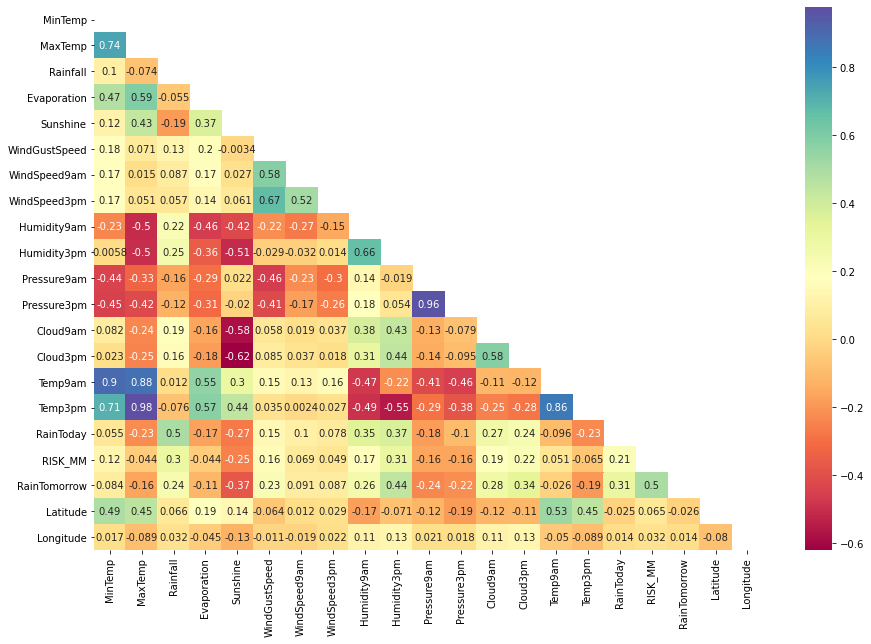

In [36]:
fig1, ax1 = plt.subplots(figsize = (15,10))
corr = df_clean.corr()
mask = np.triu(np.ones(corr.shape)).astype(np.bool)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        mask = mask,
        cmap = 'Spectral',
        annot = True,
        ax = ax1);

It appears we could have some issues with mulicollinearity. Temperature at 9am and 3pm are highly correlated.
Temperature at different points of the day are also highly correlated with min temps and max temps. Finally, pressure at different times of the day are highly correlated. We will need to take out some of these values. 

We will take out the temperature at different times. Additionally we will average the pressures and use that for our models. We also need to take out RISK_MM because it will create data leakage if we don't.

In [37]:
df_clean['Avg_Pressure'] = df_clean.apply(lambda x: (x['Pressure3pm'] + x['Pressure9am']) / 2,axis = 1)

In [38]:
reduced_corr_features = df_clean.drop(columns = ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'RISK_MM']).columns

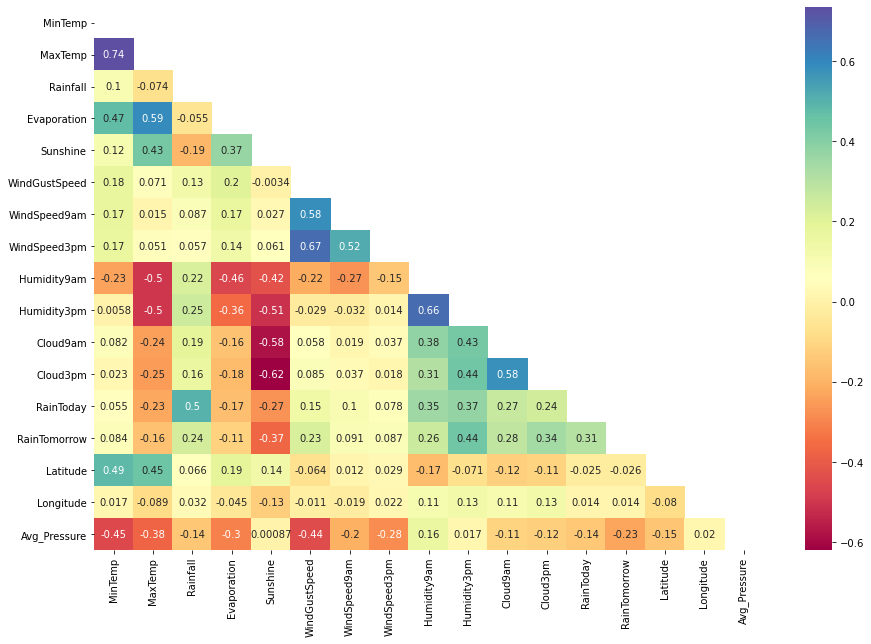

In [39]:
fig2, ax2 = plt.subplots(figsize = (15,10))
corr2 = df_clean[reduced_corr_features].corr()
mask2 = np.triu(np.ones(corr2.shape)).astype(np.bool)
# plot the heatmap
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns,
        mask = mask2,
        cmap = 'Spectral',
        annot = True,
        ax = ax2);

Great everything looks good and now we can do some statisical tests to see if we can remove anymore features.

---

## Statisical Tests

### Max Wind Gust Speeds

In [40]:
#_Two Sample t test_ comparing the sample means of the max wind gust speeds today if it rains tomorrow or not

# null: mean(rain_tom) = mean(no_rain_tom)

# alt: mean(rain_tom) != mean(no_rain_tom)

rain_tom = df_clean[df_clean['RainTomorrow'] == 1]
no_rain_tom = df_clean[df_clean['RainTomorrow'] == 0]

pop1 = rain_tom['WindGustSpeed']
pop2 = no_rain_tom['WindGustSpeed']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

88.12457973110178 0.0


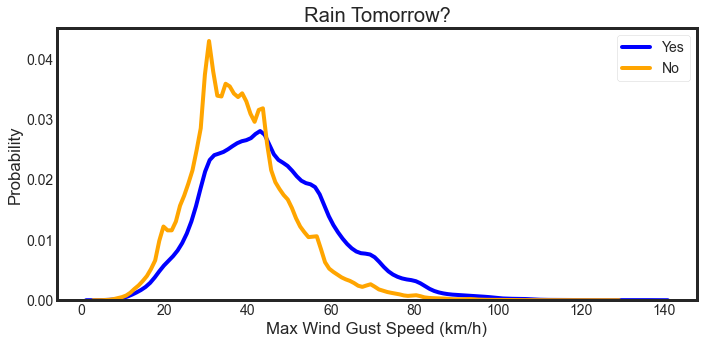

In [41]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig1, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(pop1,ax=ax, color = 'blue', label = 'Yes')
sns.kdeplot(pop2,ax=ax, color = 'orange', label = 'No')
ax.set_title('Rain Tomorrow?')
ax.set_ylabel('Probability')
ax.set_xlabel('Max Wind Gust Speed (km/h)')
ax.set_ylabel('Probability')
plt.tight_layout()

From the t-test we can reject the null with 95% confidence that the mean of the max wind gust speeds on days that it rains tomorrow and days that it doesn't rain tomorrow are the equal. Consequentlly, max wind gust speed is a good feature to keep.

### Humidity 9am

In [42]:
#_Two Sample t test_ comparing the sample means of the humidity at 9am if it rains tomorrow or not

# null: mean(rain_tom) = mean(no_rain_tom)

# alt: mean(rain_tom) != mean(no_rain_tom)

pop1 = rain_tom['Humidity9am']
pop2 = no_rain_tom['Humidity9am']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

100.16819515658419 0.0


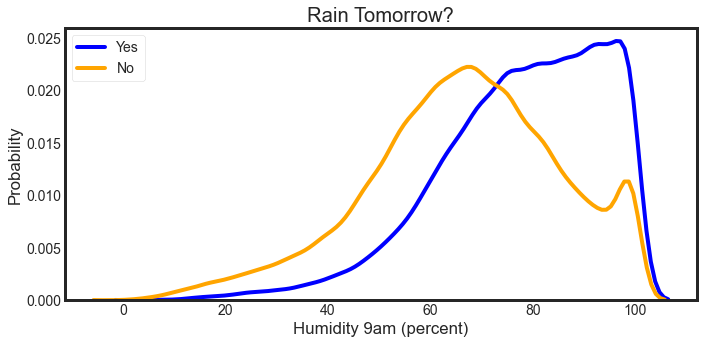

In [43]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig1, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(pop1,ax=ax, color = 'blue', label = 'Yes')
sns.kdeplot(pop2,ax=ax, color = 'orange', label = 'No')
ax.set_title('Rain Tomorrow?')
ax.set_ylabel('Probability')
ax.set_xlabel('Humidity 9am (percent)')
ax.set_ylabel('Probability')
plt.tight_layout()

We can see from the t-test that there is a statistical significance in the humidity at 9am on a day where it's going to rain tomorrow and on a day where it isn't.

### Humidity 3pm

In [44]:
#_Two Sample t test_ comparing the sample means of the humidity at 3pm if it rains tomorrow or not

# null: mean(rain_tom) = mean(no_rain_tom)

# alt: mean(rain_tom) != mean(no_rain_tom)

pop1 = rain_tom['Humidity3pm']
pop2 = no_rain_tom['Humidity3pm']

from scipy import stats

t_stat, p_val = stats.ttest_ind(pop1, pop2)

print(t_stat, p_val*2)

186.59530940372827 0.0


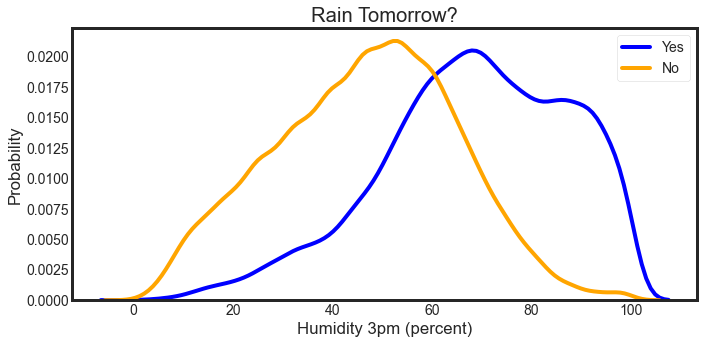

In [45]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
fig1, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(pop1,ax=ax, color = 'blue', label = 'Yes')
sns.kdeplot(pop2,ax=ax, color = 'orange', label = 'No')
ax.set_title('Rain Tomorrow?')
ax.set_ylabel('Probability')
ax.set_xlabel('Humidity 3pm (percent)')
ax.set_ylabel('Probability')
plt.tight_layout()

Again we can see that there is a statisical significance. Additionally, we can see that difference at 3pm is more significant than the difference at 9am. Consequently, humidity at 3pm will most likely be a better predictor of rain tomorrow than humidity at 9am.

### Cloud Cover 9am

In [46]:
import scipy

In [47]:
# Ho: no difference between proportion of cloud cover at 9am and if it will rain tomorrow
# Ha: difference between proportion of cloud cover at 9am and if it will rain tomorrow

In [48]:
df_clean.groupby(by = 'Cloud9am')['RainTomorrow'].value_counts().unstack()

RainTomorrow,0,1
Cloud9am,,
0,9434.0,289.0
1,15733.0,1484.0
2,9075.0,1326.0
3,11402.0,1949.0
4,14694.0,3193.0
5,14356.0,3978.0
6,12218.0,4957.0
7,15222.0,7868.0
8,8175.0,6832.0


In [49]:
observed = df_clean.groupby(by = 'Cloud9am')['RainTomorrow'].value_counts().unstack()
observed.fillna(0, inplace = True)
total_obs = df_clean.shape[0]
obs_by_rain = observed.sum(axis = 0).to_dict()
obs_by_cloud = observed.sum(axis = 1).values
expected = observed.apply(lambda x: obs_by_cloud * obs_by_rain[x.name] / total_obs ,axis = 0)

In [50]:
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
dof

9

In [51]:
# alpha is 0.05, therefore the critical chi squared is 19.9191

In [52]:
scipy.stats.chisquare(observed.values, expected, ddof = 0, axis = None)

Power_divergenceResult(statistic=12069.059048144834, pvalue=0.0)

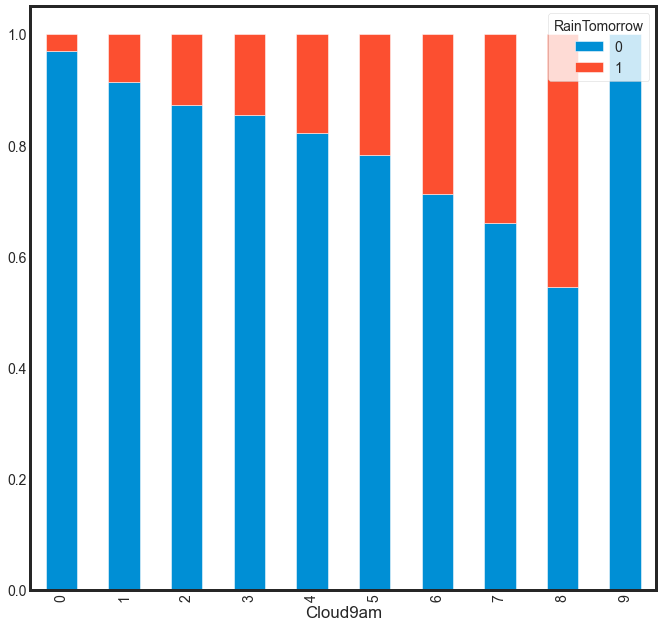

In [53]:
rain_by_cloud = df_clean.groupby(by = 'Cloud9am')['RainTomorrow'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize = (10,10))
rain_by_cloud.plot(kind = 'bar', ax = ax, stacked = True)

We can reject the null hypothesis will 95% confidence. Therefore Cloud cover at 9am should be an included feature

### Cloud Cover 3pm

In [54]:
# Ho: no difference between proportion of cloud cover at 3pm and if it will rain tomorrow
# Ha: difference between proportion of cloud cover at 3pm and if it will rain tomorrow

In [55]:
df_clean.groupby(by = 'Cloud3pm')['RainTomorrow'].value_counts().unstack()

RainTomorrow,0,1
Cloud3pm,,
0,6308.0,76.0
1,16237.0,988.0
2,9920.0,971.0
3,12284.0,1616.0
4,15744.0,3040.0
5,17076.0,4483.0
6,13219.0,5351.0
7,13666.0,8220.0
8,5856.0,7131.0


In [56]:
observed = df_clean.groupby(by = 'Cloud3pm')['RainTomorrow'].value_counts().unstack()
observed.fillna(0, inplace = True)
total_obs = df_clean.shape[0]
obs_by_rain = observed.sum(axis = 0).to_dict()
obs_by_cloud = observed.sum(axis = 1).values
expected = observed.apply(lambda x: obs_by_cloud * obs_by_rain[x.name] / total_obs ,axis = 0)

In [57]:
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
dof

9

In [58]:
scipy.stats.chisquare(observed.values, expected, ddof = 0, axis = None)

Power_divergenceResult(statistic=18139.238993858387, pvalue=0.0)

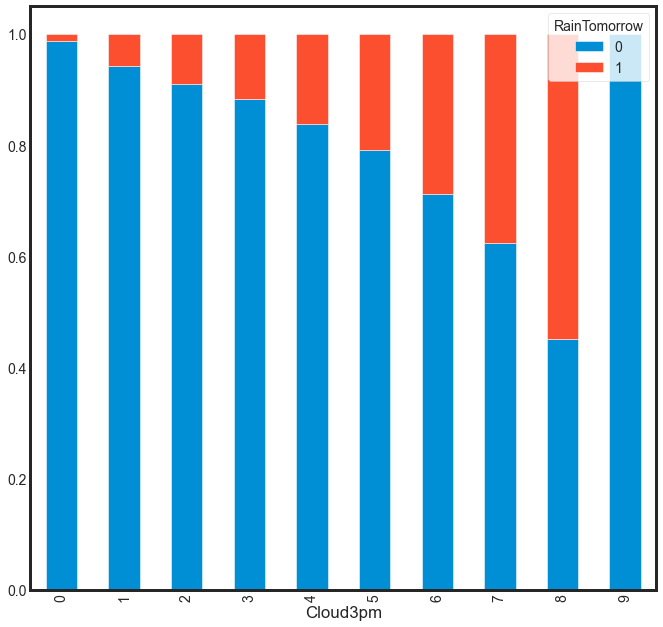

In [59]:
rain_by_cloud = df_clean.groupby(by = 'Cloud3pm')['RainTomorrow'].value_counts(normalize = True).unstack()
fig, ax = plt.subplots(figsize = (10,10))
rain_by_cloud.plot(kind = 'bar', ax = ax, stacked = True)

We can reject the null hypothesis will 95% confidence. Therefore Cloud cover at 3pm should be an included feature

---

In [60]:
df_modeling = df_clean[reduced_corr_features]

### Feature Engineering

In [61]:
df_modeling['Month'] = df_modeling['Date'].apply(lambda x: int(x[5:7]))

<ipython-input-61-61d3b11791f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modeling['Month'] = df_modeling['Date'].apply(lambda x: int(x[5:7]))


In [62]:
df_modeling.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Latitude,Longitude,GeoGroup,Avg_Pressure,Month
0,2008-12-01,ALBURY AIRPORT AWS,13.4,22.9,0.6,7.800000,11.285714,W,44.0,W,WNW,20.0,24.0,71.0,22.0,8,4,0,0,-36.069,146.9509,SouthEast,1007.40,12
1,2008-12-02,ALBURY AIRPORT AWS,7.4,25.1,0.0,8.111111,10.357143,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,3,5,0,0,-36.069,146.9509,SouthEast,1009.20,12
2,2008-12-03,ALBURY AIRPORT AWS,12.9,25.7,0.0,6.644444,10.528571,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,5,2,0,0,-36.069,146.9509,SouthEast,1008.15,12
3,2008-12-04,ALBURY AIRPORT AWS,9.2,28.0,0.0,6.866667,5.942857,NE,24.0,SE,E,11.0,9.0,45.0,16.0,5,7,0,0,-36.069,146.9509,SouthEast,1015.20,12
4,2008-12-05,ALBURY AIRPORT AWS,17.5,32.3,1.0,5.355556,6.242857,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,7,8,0,0,-36.069,146.9509,SouthEast,1008.40,12


## Modeling

In [277]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score, accuracy_score, precision_score

In [64]:
df_modeling.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Cloud9am           int64
Cloud3pm           int64
RainToday          int64
RainTomorrow       int64
Latitude         float64
Longitude        float64
GeoGroup          object
Avg_Pressure     float64
Month              int64
dtype: object

We now need to make dummies and scale our features before we can model them. First, lets seperate the features that will need dummies

In [65]:
categorical_features = list(df_modeling.loc[:,((df_modeling.dtypes == 'object') | (df_modeling.dtypes == 'int64')).to_list()].columns)

Now, lets remove the features that we won't include in modeling

In [66]:
categorical_features.remove('Date')
categorical_features.remove('RainTomorrow')

In [67]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'GeoGroup',
 'Month']

In [68]:
df_modeling = pd.get_dummies(df_modeling, columns=categorical_features, drop_first=True)

In [3]:
import pickle

with open('df_modeling.pickle', 'wb') as handle:
    pickle.dump(df_modeling, handle, protocol=pickle.HIGHEST_PROTOCOL)